In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image


In [3]:

dataset_path = "/content/drive/MyDrive/ml_5/dataset"


img_size = (100, 100)
categories = os.listdir(dataset_path)


data = []
labels = []


for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = image.load_img(img_path, target_size=img_size, color_mode="rgb")
        img_array = image.img_to_array(img) / 255.0
        data.append(img_array)
        labels.append(idx)


data = np.array(data)
labels = np.array(labels)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)


y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

print("Data Loaded Successfully")
print(f"Total Samples: {len(data)}, Training: {len(X_train)}, Testing: {len(X_test)}")


Data Loaded Successfully
Total Samples: 2400, Training: 1920, Testing: 480


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.5813 - loss: 1.1383 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9942 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9961 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 1.4569e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9937 - loss: 0.0241 - val_accuracy: 1.0000 - val_loss: 1.5540e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 7.9852e-06
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 5.4650e-06
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 3.4923e-06
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9964 - loss: 0.0124 - val_

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.0039e-05
Test Accuracy: 1.00


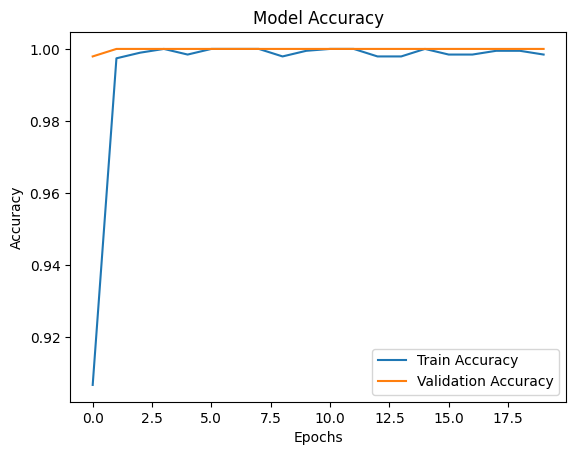

In [6]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


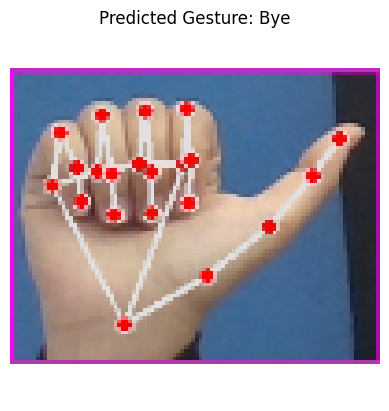

'Bye'

In [22]:
def predict_gesture(image_path, model, categories):
    img = image.load_img(image_path, target_size=img_size, color_mode="rgb")
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = categories[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted Gesture: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label


test_image_path = "/content/drive/MyDrive/ml_5/dataset/Bye/Image_1667239052.8112261.jpg"
predict_gesture(test_image_path, model, categories)
